In [ ]:
#!pip install fastai

In [ ]:
# Download digit images
from fastai.vision.all import *
path = untar_data(URLs.MNIST_SAMPLE)

In [15]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [16]:
!head -10 /root/.fastai/data/mnist_sample/labels.csv

name,label
train/3/7463.png,0
train/3/21102.png,0
train/3/31559.png,0
train/3/46882.png,0
train/3/26209.png,0
train/3/41391.png,0
train/3/11910.png,0
train/3/52435.png,0
train/3/21660.png,0


In [17]:
!ls -l /root/.fastai/data/mnist_sample/valid/3 | wc -l

1011


In [ ]:
!ls -l /root/.fastai/data/mnist_sample/valid/7 | wc -l

1029


In [18]:
!ls -l /root/.fastai/data/mnist_sample/train/3 | wc -l

6132


In [19]:
!ls -l /root/.fastai/data/mnist_sample/train/7 | wc -l

6266


In [20]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [21]:
(path/'train'/'3').ls().sorted()

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [22]:
(path/'train'/'7').ls().sorted()

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [23]:
threes = (path/'train'/'3').ls().sorted()

In [24]:
sevens = (path/'train'/'7').ls().sorted()

In [25]:
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [26]:
im3_path = threes[1]

In [27]:
im3_path

Path('/root/.fastai/data/mnist_sample/train/3/10000.png')

In [28]:
im3 = Image.open(im3_path)

In [29]:
im3

In [30]:
im3.shape

(28, 28)

In [31]:
array(im3).shape

(28, 28)

In [32]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
type(tensor(im3))

torch.Tensor

In [34]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [35]:
im3_t = tensor(im3)

In [36]:
df = pd.DataFrame(im3_t[4:15,4:22])

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [38]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# First Try: Pixel similarity

In [39]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [40]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [42]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

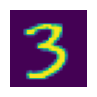

In [43]:
show_image(three_tensors[1])

In [44]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [45]:
stacked_sevens.shape, len(seven_tensors), seven_tensors[0].shape

(torch.Size([6265, 28, 28]), 6265, torch.Size([28, 28]))

In [46]:
stacked_sevens.mean(0).shape

torch.Size([28, 28])

<Axes: >

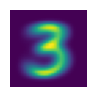

In [47]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

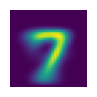

In [48]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [49]:
show_image(stacked_sevens.mean(2))

<Axes: >

In [50]:
show_image(stacked_threes.mean(2))

<Axes: >